In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import pandas as pd
from sklearn import model_selection, linear_model



In [3]:
#load data 
data = pd.read_csv('data/hour.csv', sep=',', header=0,)
#convert to numpy array
data_array = np.array(data)
#data_array.shape

In [4]:
# # splitting training and testing data (features)
X = data_array[:,:-3]
# remove date column (second column)
X = np.delete(X, 1, 1) 
# splitting training and testing data (targer)
y_casual = data_array[:,-3]
y_registered = data_array[:,-2]
y_cnt = data_array[:,-1]

In [5]:
# split the data for training 
X_train, X_test, y_registered_train, y_registered_test = model_selection.train_test_split(X, y_registered, test_size=0.2)
y_registered_train = y_registered_train[:,np.newaxis]
y_registered_test = y_registered_test[:,np.newaxis]

print(X_train.shape, X_test.shape,y_registered_train.shape, y_registered_test.shape )



(13903, 13) (3476, 13) (13903, 1) (3476, 1)


In [6]:
# idk why but we need to change type even thou type(y_registered) output is the same before and after 
# but it fixes following error 
# ValueError: Unknown label type: 'unknown'
y_registered_train=y_registered_train.astype('int')
y_registered_test=y_registered_test.astype('int')


In [7]:

regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_registered_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_registered_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_registered_test))


Coefficients: [[ -3.46525513e-03   1.72042092e+01   1.01469987e+02   2.52538921e+00
    6.55018548e+00  -9.79439423e+00   9.60212194e-01   3.87463107e+01
   -4.86738435e+00   5.94157872e+01   1.38051315e+02  -1.29148864e+02
    3.58999499e+01]]
Residual sum of squares: 15108.00
Variance score: 0.33


In [16]:
# split the data to use just one feature with the highest coeficient
X_train =  X_train[:,feature_column]
X_test = X_test[:,feature_column]

X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [17]:
# print (X_train.shape)
# print (X_test.shape)

# print (y_registered_train.shape)
# print (y_registered_test.shape)

In [18]:
# do regression just for one feature
regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_registered_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# The coefficients and scores 
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_registered_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_registered_test))


Coefficients: [[ 294.5524964]]
Residual sum of squares: 18612.54
Variance score: 0.11


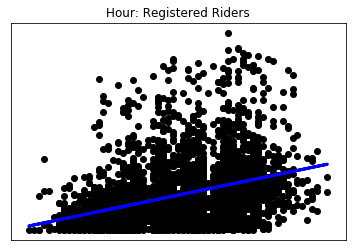

In [21]:
#visualize w/plot 

# Plot outputs
plt.scatter(X_test, y_registered_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.title('Hour: Registered Riders')
plt.show()